/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading model across multiple GPUs...


/home/guangwei/miniconda3/envs/zdh/lib/python3.12/site-packages/transformers/generation/configuration_utils.py:774: UserWarning: `return_dict_in_generate` is NOT set to `True`, but `output_hidden_states` is. When `return_dict_in_generate` is not `True`, `output_hidden_states` is ignored.
  warnings.warn(
Loading checkpoint shards: 100%|██████████| 30/30 [01:10<00:00,  2.33s/it]


Model loaded successfully.
Extracting hidden states for non_infringement texts...


Processing data batches: 100%|██████████| 97/97 [02:03<00:00,  1.27s/it]


Extracting reference embeddings for non_infringement texts...


Processing references: 100%|██████████| 97/97 [00:01<00:00, 96.12it/s] 


Extracting hidden states for infringement texts...


Processing data batches: 100%|██████████| 62/62 [01:10<00:00,  1.14s/it]


Extracting reference embeddings for infringement texts...


Processing references: 100%|██████████| 62/62 [00:00<00:00, 122.29it/s]


Data successfully split into training and test sets.


Training Epochs:   0%|          | 1/250 [00:00<00:25,  9.69it/s]

Epoch 10/250, Loss: 0.9060
Test Accuracy: 88.28%, F1-score: 0.9068
New best model saved with Accuracy 88.28%.


Training Epochs:   4%|▍         | 10/250 [00:00<00:05, 45.22it/s]

New best model saved with F1-score 0.9068.
Epoch 20/250, Loss: 0.4612
Test Accuracy: 91.41%, F1-score: 0.9308
New best model saved with Accuracy 91.41%.


Training Epochs:   8%|▊         | 20/250 [00:00<00:03, 64.21it/s]

New best model saved with F1-score 0.9308.
Epoch 30/250, Loss: 0.3957
Test Accuracy: 91.41%, F1-score: 0.9333
New best model saved with F1-score 0.9333.
Epoch 40/250, Loss: 0.3716
Test Accuracy: 92.19%, F1-score: 0.9398


Training Epochs:  16%|█▌        | 40/250 [00:00<00:02, 93.46it/s]

New best model saved with Accuracy 92.19%.
New best model saved with F1-score 0.9398.
Epoch 50/250, Loss: 0.3377
Test Accuracy: 89.06%, F1-score: 0.9136
Epoch 60/250, Loss: 0.3038
Test Accuracy: 90.62%, F1-score: 0.9268


Training Epochs:  40%|████      | 100/250 [00:00<00:00, 241.29it/s]

Epoch 70/250, Loss: 0.2876
Test Accuracy: 89.84%, F1-score: 0.9202
Epoch 80/250, Loss: 0.2722
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 90/250, Loss: 0.2553
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 100/250, Loss: 0.2400
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 110/250, Loss: 0.2323
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 120/250, Loss: 0.2290
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 130/250, Loss: 0.2160
Test Accuracy: 92.19%, F1-score: 0.9398


Training Epochs:  56%|█████▌    | 140/250 [00:00<00:00, 277.98it/s]

Epoch 140/250, Loss: 0.1978
Test Accuracy: 93.75%, F1-score: 0.9512
New best model saved with Accuracy 93.75%.
New best model saved with F1-score 0.9512.
Epoch 150/250, Loss: 0.1840
Test Accuracy: 93.75%, F1-score: 0.9512
Epoch 160/250, Loss: 0.2419
Test Accuracy: 92.19%, F1-score: 0.9398


Training Epochs:  76%|███████▌  | 190/250 [00:00<00:00, 304.41it/s]

Epoch 170/250, Loss: 0.2090
Test Accuracy: 92.19%, F1-score: 0.9398
Epoch 180/250, Loss: 0.1823
Test Accuracy: 93.75%, F1-score: 0.9512
Epoch 190/250, Loss: 0.1533
Test Accuracy: 98.44%, F1-score: 0.9873
New best model saved with Accuracy 98.44%.
New best model saved with F1-score 0.9873.


Training Epochs:  98%|█████████▊| 246/250 [00:00<00:00, 372.75it/s]

Epoch 200/250, Loss: 0.1394
Test Accuracy: 93.75%, F1-score: 0.9512
Epoch 210/250, Loss: 0.1478
Test Accuracy: 98.44%, F1-score: 0.9873
Epoch 220/250, Loss: 0.1267
Test Accuracy: 94.53%, F1-score: 0.9536
Epoch 230/250, Loss: 0.2384
Test Accuracy: 93.75%, F1-score: 0.9512
Epoch 240/250, Loss: 0.1404
Test Accuracy: 98.44%, F1-score: 0.9873


Training Epochs: 100%|██████████| 250/250 [00:00<00:00, 254.80it/s]


Epoch 250/250, Loss: 0.1361
Test Accuracy: 98.44%, F1-score: 0.9873


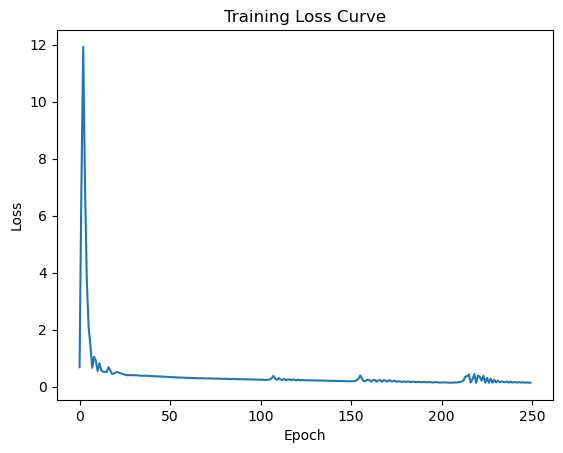

Training complete. Best Accuracy: 98.44%, Best F1-score: 0.9873


: 

In [ ]:
import torch
import torch.nn as nn
import numpy as np
from sklearn.metrics import accuracy_score, classification_report, f1_score
import matplotlib.pyplot as plt
from tqdm import tqdm
from transformers import AutoTokenizer, AutoModelForCausalLM, AutoModel
import json
import os

os.environ["CUDA_VISIBLE_DEVICES"] = "4,5,6,7"

model_name = '/raid/data/guangwei/huggingface/hub/models--meta-llama--Llama-3.1-70B/snapshots/349b2ddb53ce8f2849a6c168a81980ab25258dac/'
non_infringement_file = '/raid/data/guangwei/copyright_newVersion/test_division/literal.non_infringement.json'
infringement_file = '/raid/data/guangwei/copyright_newVersion/test_division/literal.infringement.json'
checkpoint_file = '/raid/data/guangwei/copyright_newVersion/models/1.pth'

class CustomMLP(nn.Module):
    def __init__(self, input_dim, hidden_dim):
        super(CustomMLP, self).__init__()
        self.down = nn.Linear(input_dim, hidden_dim)
        self.gate = nn.Linear(input_dim, hidden_dim)
        self.up = nn.Linear(hidden_dim, 1)
        self.activation = nn.SiLU()

    def forward(self, x):
        down_output = self.down(x)
        gate_output = self.gate(x)
        gated_output = down_output * self.activation(gate_output)
        return self.up(gated_output)


def extract_hidden_states(texts, model, tokenizer, batch_size=4):
    hidden_states = []
    for i in tqdm(range(0, len(texts), batch_size), desc="Processing data batches"):
        batch_texts = texts[i:i + batch_size]
        inputs = tokenizer(batch_texts, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: val.to("cuda") for key, val in inputs.items()} 
        with torch.no_grad():
            outputs = model(**inputs)
        last_layer_hidden_states = outputs.hidden_states[-1]
        last_token_hidden_states = last_layer_hidden_states[:, -1, :].cpu().numpy() 
        hidden_states.append(last_token_hidden_states)
    return np.vstack(hidden_states)

def extract_reference_embeddings(references, model, tokenizer, batch_size=4):
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)
    embeddings = []
    for i in tqdm(range(0, len(references), batch_size), desc="Processing references"):
        batch_references = references[i:i + batch_size]
        inputs = tokenizer(batch_references, return_tensors="pt", padding=True, truncation=True)
        inputs = {key: val.to(device) for key, val in inputs.items()}  
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings.append(outputs.pooler_output.cpu().numpy())
    return np.vstack(embeddings)

def load_data(non_infringement_file, infringement_file):
    with open(non_infringement_file, 'r', encoding='utf-8') as file:
        non_infringement_json_data = json.load(file)

    non_infringement_outputs = [entry['input'] for entry in non_infringement_json_data]
    non_infringement_references = [entry['reference'] for entry in non_infringement_json_data]
    y_non_infringement = [1] * len(non_infringement_outputs)

    with open(infringement_file, 'r', encoding='utf-8') as file:
        infringement_json_data = json.load(file)

    infringement_outputs = [entry['input'] for entry in infringement_json_data]
    infringement_references = [entry['reference'] for entry in infringement_json_data]
    y_infringement = [0] * len(infringement_outputs)

    return non_infringement_outputs, non_infringement_references, y_non_infringement, infringement_outputs, infringement_references, y_infringement

def load_large_model(model_name):
    """Load the large model and distribute it across multiple GPUs"""
    print("Loading model across multiple GPUs...")
    model = AutoModelForCausalLM.from_pretrained(
        model_name,
        device_map="balanced",  
        offload_folder="offload", 
        offload_state_dict=True,
        output_hidden_states=True
    )
    print("Model loaded successfully.")
    return model


def train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim, epochs=250, lr=0.001, checkpoint_path=checkpoint_file):
    custom_mlp = CustomMLP(input_dim, hidden_dim).to("cuda")
    criterion = nn.BCEWithLogitsLoss()
    optimizer = torch.optim.Adam(custom_mlp.parameters(), lr=lr)

    X_train_tensor = torch.tensor(X_train, dtype=torch.float32).to("cuda")
    y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1).to("cuda")

    best_f1 = -float('inf') 
    best_accuracy = -float('inf') 
    losses = []

    for epoch in tqdm(range(epochs), desc="Training Epochs"):
        custom_mlp.train()
        optimizer.zero_grad()
        outputs = custom_mlp(X_train_tensor)
        loss = criterion(outputs, y_train_tensor)
        loss.backward()
        optimizer.step()
        losses.append(loss.item())

        if (epoch + 1) % 10 == 0:
            print(f"Epoch {epoch + 1}/{epochs}, Loss: {loss.item():.4f}")
            custom_mlp.eval()
            X_test_tensor = torch.tensor(X_test, dtype=torch.float32).to("cuda")
            with torch.no_grad():
                y_pred_logits = custom_mlp(X_test_tensor)
                y_pred = (torch.sigmoid(y_pred_logits) > 0.5).float().cpu().numpy()

            accuracy = accuracy_score(y_test, y_pred)
            f1 = f1_score(y_test, y_pred)
            print(f"Test Accuracy: {accuracy * 100:.2f}%, F1-score: {f1:.4f}")
            
            if accuracy > best_accuracy:
                best_accuracy = accuracy
                torch.save(custom_mlp.state_dict(), checkpoint_path) 
                print(f"New best model saved with Accuracy {best_accuracy * 100:.2f}%.")

            if f1 > best_f1:
                best_f1 = f1
                torch.save(custom_mlp.state_dict(), checkpoint_path) 
                print(f"New best model saved with F1-score {best_f1:.4f}.")

    plt.plot(losses)
    plt.title("Training Loss Curve")
    plt.xlabel("Epoch")
    plt.ylabel("Loss")
    plt.show()

    return custom_mlp, best_accuracy, best_f1

tokenizer = AutoTokenizer.from_pretrained(model_name, model_max_length=512)
model = load_large_model(model_name)
tokenizer.pad_token = tokenizer.eos_token
bert_tokenizer = AutoTokenizer.from_pretrained('google-bert/bert-base-uncased')
bert_model = AutoModel.from_pretrained('google-bert/bert-base-uncased')
bert_tokenizer.pad_token = tokenizer.eos_token

non_infringement_outputs, non_infringement_references, y_non_infringement, infringement_outputs, infringement_references, y_infringement = load_data(
    non_infringement_file, infringement_file
)

y_non_infringement = np.array(y_non_infringement)
y_infringement = np.array(y_infringement)

print("Extracting hidden states for non_infringement texts...")
X_non_infringement = extract_hidden_states(non_infringement_outputs, model, tokenizer)
print("Extracting reference embeddings for non_infringement texts...")
reference_embeddings_non_infringement = extract_reference_embeddings(non_infringement_references, bert_model, bert_tokenizer)
X_non_infringement_combined = np.hstack([X_non_infringement, reference_embeddings_non_infringement])

print("Extracting hidden states for infringement texts...")
X_infringement = extract_hidden_states(infringement_outputs, model, tokenizer)
print("Extracting reference embeddings for infringement texts...")
reference_embeddings_infringement = extract_reference_embeddings(infringement_references, bert_model, bert_tokenizer)
X_infringement_combined = np.hstack([X_infringement, reference_embeddings_infringement])

split_index_non_infringement = int(0.8 * len(X_non_infringement_combined))
X_non_infringement_train = X_non_infringement_combined[:split_index_non_infringement]
X_non_infringement_test = X_non_infringement_combined[split_index_non_infringement:]
y_non_infringement_train = y_non_infringement[:split_index_non_infringement]
y_non_infringement_test = y_non_infringement[split_index_non_infringement:]

split_index_infringement = int(0.8 * len(X_infringement_combined))
X_infringement_train = X_infringement_combined[:split_index_infringement]
X_infringement_test = X_infringement_combined[split_index_infringement:]
y_infringement_train = y_infringement[:split_index_infringement]
y_infringement_test = y_infringement[split_index_infringement:]

X_train = np.vstack((X_non_infringement_train, X_infringement_train))
X_test = np.vstack((X_non_infringement_test, X_infringement_test))
y_train = np.concatenate((y_non_infringement_train, y_infringement_train))
y_test = np.concatenate((y_non_infringement_test, y_infringement_test))

print("Data successfully split into training and test sets.")

input_dim = X_train.shape[1]
hidden_dim = 256

trained_model, best_accuracy, best_f1 = train_model(X_train, y_train, X_test, y_test, input_dim, hidden_dim)
print(f"Training complete. Best Accuracy: {best_accuracy * 100:.2f}%, Best F1-score: {best_f1:.4f}")
